 <h1 style="text-align:center; font-size:52px"> Livrable du Projet IA:</h1>
<div>
<em> 
    <strong> Groupe : 01 <br/> 
       DI MENZA Antonin <br/> 
        MAZOUNI Chiraz <br/> 
        CARAMAN Nichita <br/> 
        ZHENG MENG <br/> 
        TAO Yanwu <br/> 
     </strong> <br/> 
    <br/>
</em>
</div>


## INTRODUCTION
L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

- Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

- Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

- Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

La direction fait donc appel à nous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et leurs proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

# Problématique:
<p style="font-size:14px"> •Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.</p>
<p style="font-size:14px"> • Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.</p>
<p style="font-size:14px"> • Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.</p>

# Objectif: 
* Déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over.
* Proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

# Données fournies:

* <strong>Données du service des ressources humaines:</strong> qui est un fichier csv contennant les informations générales des employés
* <strong>Dernière évaluation du manager:</strong> qui est un ficher csv contennant la dernière évaluation de chaque employé faite pas son manager.
* <strong>Enquête qualité de vie au travail:</strong> qui est un fichier csv contennant le retour concernant la qualité de vie au travail de chaque employé.
* <strong>Horaires de travail:</strong> qui est un fichier csv contennant les horaires d'entrée et de sortie des employés sur une période de l'année.

# Solution:
Suite aux données et informations fournies, on a mis en oeuvre une analyse du problème courant afin de trouver une solution en passant par les étapes suivantes:

## Imports python générique

Plusieurs bibliothèques ont été requise afin d'effectuer notre analyse, les plus importantes: 
    
* __OS__ : Afin gérer nos intéractions avec les fichiers de données.
* __pandas__ : Afin travailler avec des __dataframe__.
* __datetime__ : Si nous devons intéragir avec des dates.
* __matplotlib__ : Afin afficher des données de manière plus graphique.

## I - Préparation de l'environnement:
<p style="font-size:14px">C'est une étape qui nous permet de préparer les données en analysant par exemple les valeurs null, en fusionnant les datasets fournies, en supprimant les attributs qui n'influencent pas dans l'analyse pour le but d'obtenir des données fiables en quantité et en qualité, cohérentes et structurées afin que l’analyse soit la plus performante possible.</p>
Commençons d'abord par importer les fichiers dont nous disposons, puis les lire sous forme de dataframe pour qu'il soit manipulable durant notre travail:

### 1 - Importation des données et chargement des données en mémoire: 

In [74]:
# imports
import pandas as pd
import numpy as np
import os
import tarfile
import requests
from six.moves import urllib
# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#Setting up plt
plt.rc('figure', figsize=[20, 15])
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import os
import tarfile
from six.moves import urllib

# Récupérer la dataset depuis github 
DOWNLOAD_ROOT = "https://github.com/Chiraz7/Project/raw/main/"
DATASETS_PATH = "datasets"
DATASETS_URL = DOWNLOAD_ROOT + "Data_project.tgz"

# Ouvrir la datasset et extraire tous les fichiers
def fetch_dataset(datasets_url=DATASETS_URL, datasets_path=DATASETS_PATH):
    if not os.path.isdir(datasets_path):
        os.makedirs(datasets_path)
    tgz_path = os.path.join(datasets_path, "Data_project.tgz")
    urllib.request.urlretrieve(datasets_url, tgz_path)
    datassets_tgz = tarfile.open(tgz_path)
    datassets_tgz.extractall(path=datasets_path)
    datassets_tgz.close()

    # Exécuter la fonction
fetch_dataset()

In [75]:
# Chargerement des données en mémoire
import pandas as pd

def load_data(file_name):
    csv_path = os.path.join(DATASETS_PATH, file_name)
    return pd.read_csv(csv_path)

### 2 - Attribuer chaque fichier csv à une variable:
La fonction ci-dessus nous permet de charger les données en mémoire:

In [76]:
# attribuer chaque fichier csv a une variable pour pouvoir manipluer chaque fichier
general = load_data("general_data.csv")
employee_survey_data = load_data("employee_survey_data.csv")
manager_survey_data = load_data("manager_survey_data.csv")
in_time = load_data("in_time.csv")
out_time = load_data("out_time.csv")

<h1 style="font-size:20px">3- Coup d'oeil:</h1>
<p style="font-size:14px"> Dans cette partie on a visualisé le contenu de chaque Dataset:</p>
<p style="font-size:14px;font-weight:bold">a- Informations générales :</p>

In [77]:
# Afficher les 5 premières lignes de cette dataset
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [78]:
general.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [79]:
general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeID'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>]], dtype=object)

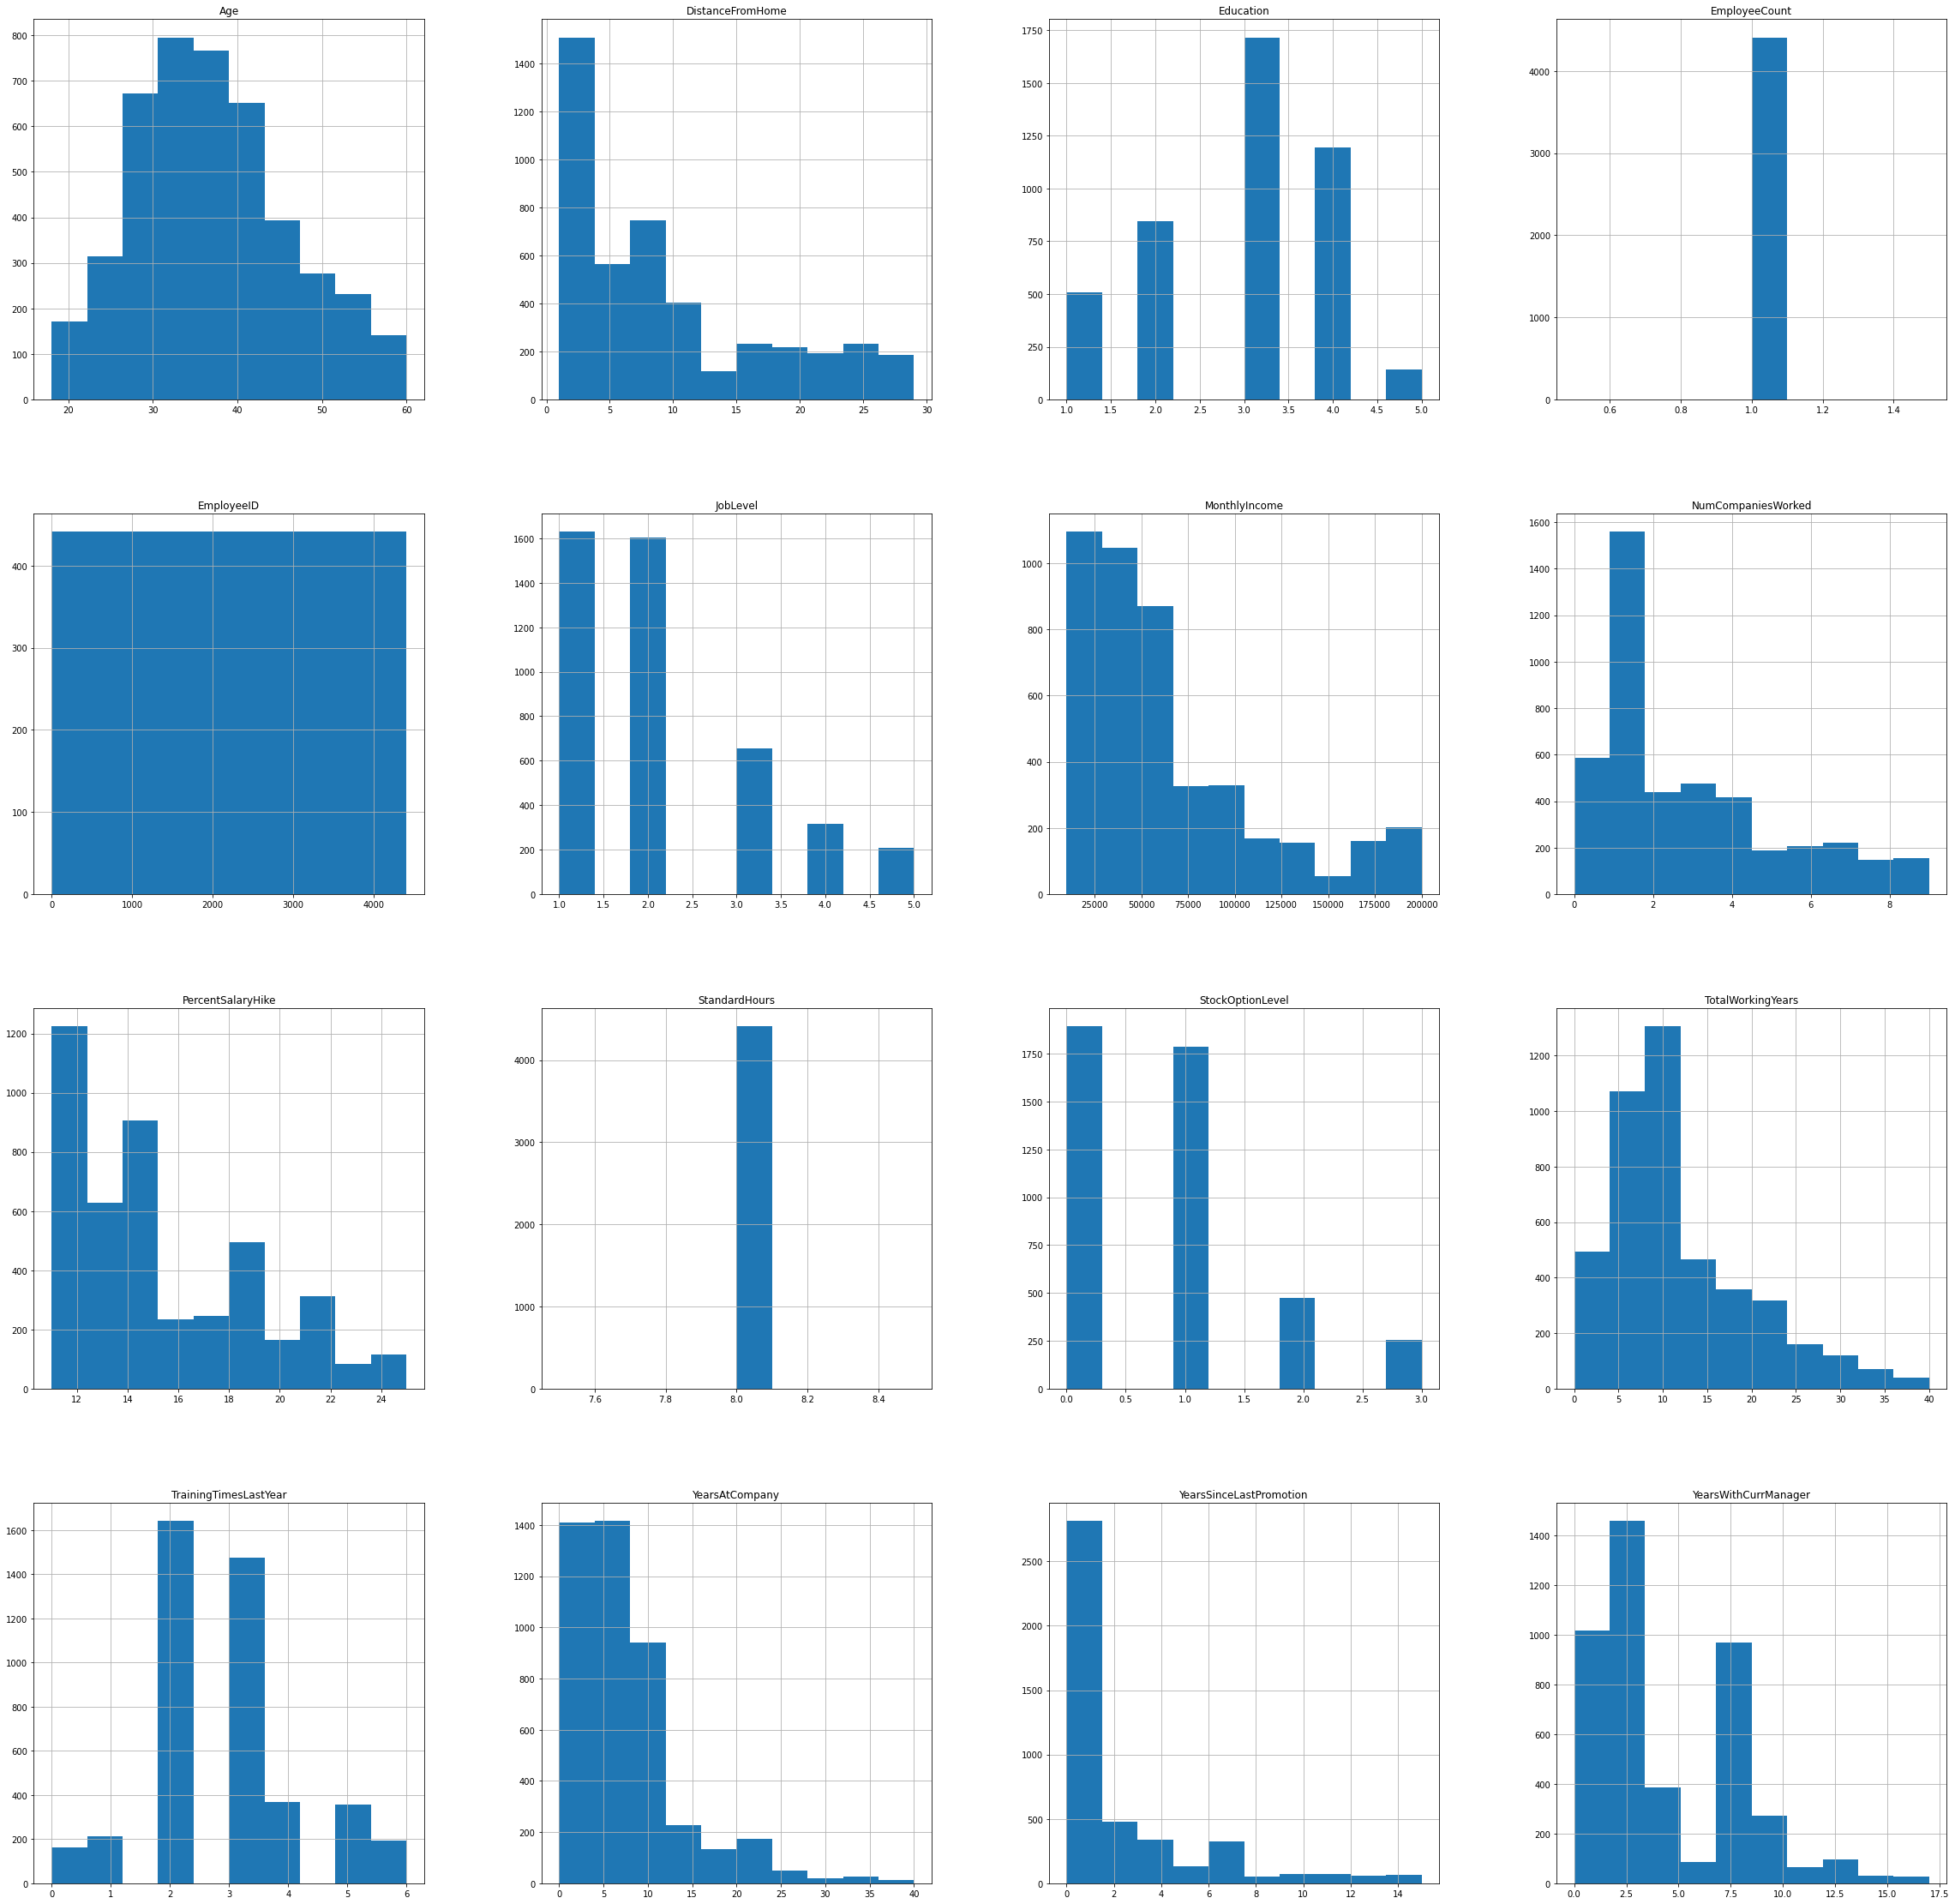

In [80]:
general.hist(figsize=(40, 40))

On peut constater dans cette dataset qu'il y'a les informations de chaque employé comme l'âge, département, l'Id, l'attrition pour voir si un employé a démissionné en 2016...etc

Premièrement, on a décidé de supprimer des attributs qui n'influent pas sur l'analyse comme:

- EmployeeCount: car elle contient que des 1 donc ne va pas influencer l'analyse.

- Over18: car tous les employés ont plus de 18ans ce qui fait que toutes les valeurs sont identiques.

- StandardHours: Tous les employés doivent travailler 8h par jour.
- Age: Fait parti des données sensibles qui vont à l’encontre de l’éthique.
- Gender : Fait parti des données sensibles qui vont à l’encontre de l’éthique.
- Marital Status : Fait parti des données sensibles qui vont à l’encontre de l’éthique.
- DistanceFromHome : Car on remarque que la majorité des employés ne travaillent pas loin donc ce n'est pas une donnée qui va influer l'analyse dans notre cas.


Et on constate qu'il y a les valeurs manquantes qui peuvent influencer sur l'analyse en utilisant une fonction comme le montre ci-dessus: 

In [81]:
# calculer nombre de valeurs manquantes à chaque attribut
general.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<p style="font-size:14px">Le résultat montre que <strong>NumCompaniesWorked contient 19 valeurs manquantes</strong> et <strong>TotalWorkingYears en contient 9 </strong> que nous allons régler après fusion des datasets.</p>
<p style="font-size:14px">Cette dataset contient la colonne Atrition : ci-dessous le nombre exacte de personnes ayant quitté l'entreprise  en 2016:  </p>

In [82]:
# calcul combien il y a de nombre de chaque variable d'une colonne
print(general.Attrition.value_counts())

No     3699
Yes     711
Name: Attrition, dtype: int64


<Axes: >

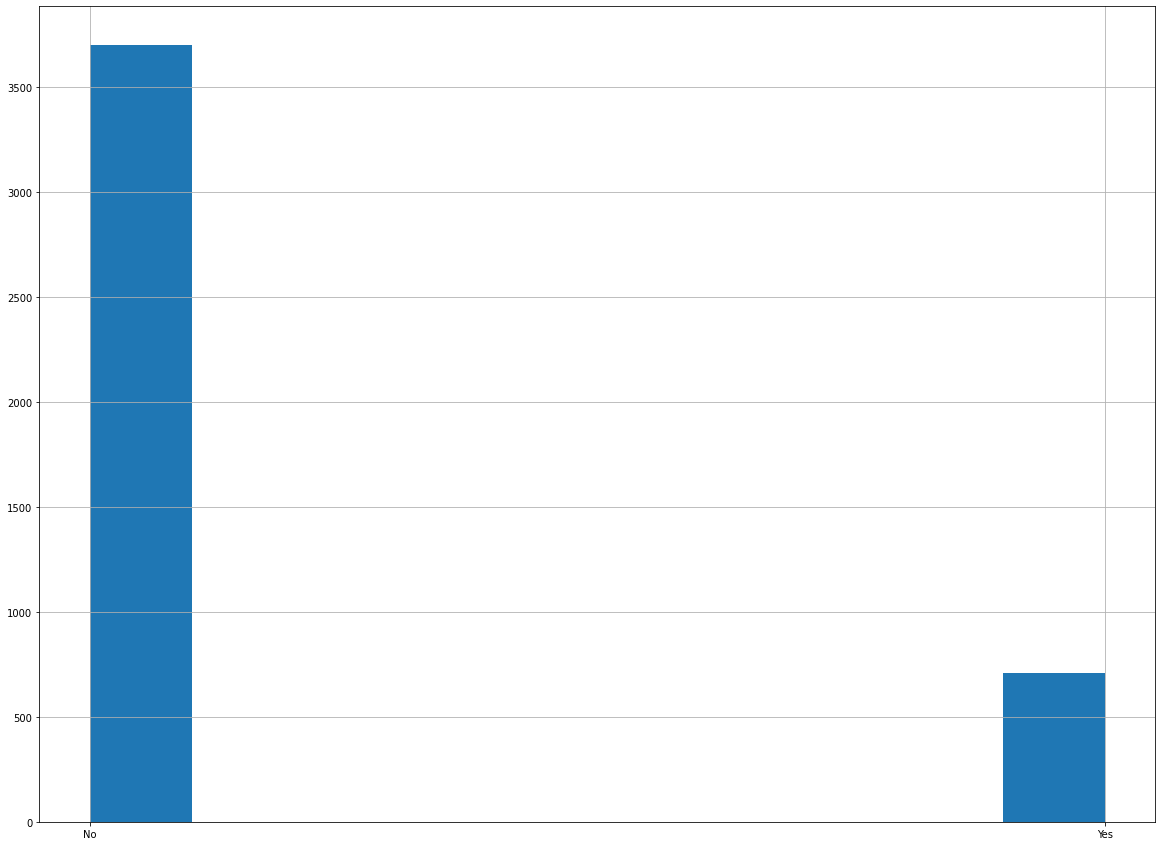

In [127]:
general['Attrition'].hist()

Comme on peut constater il y'a 3699/4410 personnes qui n'ont pas démissionné ce qui représente 84% et 711/3966 qui représente 16%, qui est un nombre assez élevé concernant les personnes qui ont quitté l'entreprise.
<p style="font-size:16px;font-weight:bold">b-Enquête qualité de vie au travail: </p>

In [84]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


On constate qu'on a besoin de toutes ces colonnes, car elles représentent l'évaluation de chaque employé qui peut affecter sa démission, donc pas de colonnes à supprimer.

Maintenant, on va trouver les valeurs manquantes qui peuvent influencer l'analyse en utilisant une fonction comme le montre ci-dessous:

In [85]:
employee_survey_data.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

<p style="font-size:14px">Le résultat montre que <strong>EnvironmentSatisfaction contient 25 valeurs manquantes</strong> , <strong>JobSatisfaction contient 20 valeurs manquantes</strong> et <strong>WorkLifeBalance en contient 38 </strong> que nous allons régler après la fusion des datasets.</p>
<p style="font-size:16px;font-weight:bold">c- Dernière évaluation du manager:</p>

In [86]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [87]:
manager_survey_data.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

<p style="font-size:16px">On remarque qu'il y a pas de valeurs manquantes dans cette dataset.</p>
<p style="font-size:16px;font-weight:bold">d- Horaires de travail:</p>
<p style="font-size:16px">On a deux datasets qui représentent les horraires du travail ou on va faire des traitements afin de faciliter l'analyse:</p>
<p style="font-size:16px"><strong>Les heures d'entrée:</strong></p>

In [88]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


<p style="font-size:16px"><strong>Les heures de sortie:</strong></p>

In [89]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


La fonction ci-dessous sert à trouver le nombre de valeurs manquantes :

In [90]:
in_time.isnull().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

### 4 - Traitements des données de temps
<p style="font-size:14px">Dans cette partie, nous allons traiter les données presentes dans les fichiers in_time et out_time qui represente les horaires de d'entrées et de sorties de chaque employé(e)s. </p>

<p style="font-size:14px">Voici les étapes a suivre:</p>
<p style="font-size:14px">- Supprimer les colonnes vides.</p>
<p style="font-size:14px">- Transformer chaque case en objet `datetime`</p>
<p style="font-size:14px">- Calculer la différence entre les 2 dataset</p>
<p style="font-size:14px">- Calculer la moyenne de chaque ligne (chaque employé(e))</p>
<p style="font-size:14px">- Ajouter une nouvelle colonne au dataset general </p>

On transforme les colonnes "in_time" et "out_time" en données exploitables en convertissant ces valeurs en objets "datetime" et en calculant la différence entre ces deux temps.

Ensuite, le temps de travail moyen est calculé pour chaque employé en utilisant le DataFrame "time_diff", et cette valeur est ajoutée en tant que nouvelle colonne au DataFrame "general".

Enfin, la colonne "AverageWorkingTime" est affichée dans la console.

In [91]:
#Transform in_time and out_time into usable data (Difference between the two for each day)
#out_time.drop(["Unnamed: 0"], axis=1, inplace=True)
out_time.dropna(how='all', axis=1, inplace=True)
#in_time.drop(["Unnamed: 0"], axis=1, inplace=True)
in_time.dropna(how='all', axis=1, inplace=True)
time_diff = (out_time.apply(pd.to_datetime) - in_time.apply(pd.to_datetime))
# #Get the mean for each employee and add the new column to our dataset
general["AverageWorkingTime"] = time_diff.mean(axis=1).dt.total_seconds() / 3600
general["AverageWorkingTime"]

0       7.342004
1       7.686399
2       6.984379
3       7.163197
4       7.973629
          ...   
4405    8.487350
4406    6.067777
4407    7.673414
4408    9.453369
4409    6.958952
Name: AverageWorkingTime, Length: 4410, dtype: float64

### 5 - Fusion des dataset
Dans cette partie, nous allons fusionner nos jeux de données (general, employee_survey_data, manager_survey_data, time_diff). <strong>sauf in_time et out_time puisque on calcule la moyenne des heures travaillées par chaque employé pour l'affecter au data set "general"</strong> <br/>

In [92]:
#After taking a look at the datas, we can merge general, employee_survey_data and manager_survey_data
#To be more efficient and find any correlation with our target feature "Attrition"
dataset = general.merge(employee_survey_data, on="EmployeeID")
dataset = dataset.merge(manager_survey_data, on="EmployeeID")

Nous allons supprimer aussi les colonnes mentionnées plus haut : 

In [93]:
#We drop columns that are deemed useless (EmployeeCount, StandardHours, Over18 values are unique)
dataset.drop(["EmployeeID","EmployeeCount", "Gender", "StandardHours", "Over18","Age","DistanceFromHome","MaritalStatus"], axis=1, inplace=True)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   Education                4410 non-null   int64  
 4   EducationField           4410 non-null   object 
 5   JobLevel                 4410 non-null   int64  
 6   JobRole                  4410 non-null   object 
 7   MonthlyIncome            4410 non-null   int64  
 8   NumCompaniesWorked       4391 non-null   float64
 9   PercentSalaryHike        4410 non-null   int64  
 10  StockOptionLevel         4410 non-null   int64  
 11  TotalWorkingYears        4401 non-null   float64
 12  TrainingTimesLastYear    4410 non-null   int64  
 13  YearsAtCompany           4410 non-null   int64  
 14  YearsSinceLastPromotion 

In [95]:
dataset.head()

,Attrition,BusinessTravel,Department,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageWorkingTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,No,Travel_Rarely,Sales,2,Life Sciences,1,Healthcare Representative,131160,1.0,11,...,6,1,0,0,7.342004,3.0,4.0,2.0,3,3
1,Yes,Travel_Frequently,Research & Development,1,Life Sciences,1,Research Scientist,41890,0.0,23,...,3,5,1,4,7.686399,3.0,2.0,4.0,2,4
2,No,Travel_Frequently,Research & Development,4,Other,4,Sales Executive,193280,1.0,15,...,2,5,0,3,6.984379,2.0,2.0,1.0,3,3
3,No,Non-Travel,Research & Development,5,Life Sciences,3,Human Resources,83210,3.0,11,...,5,8,7,5,7.163197,4.0,4.0,3.0,2,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,Sales Executive,23420,4.0,12,...,2,6,0,4,7.973629,4.0,1.0,3.0,3,3


### 6 - Pipeline de transformation

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   Education                4410 non-null   int64  
 4   EducationField           4410 non-null   object 
 5   JobLevel                 4410 non-null   int64  
 6   JobRole                  4410 non-null   object 
 7   MonthlyIncome            4410 non-null   int64  
 8   NumCompaniesWorked       4391 non-null   float64
 9   PercentSalaryHike        4410 non-null   int64  
 10  StockOptionLevel         4410 non-null   int64  
 11  TotalWorkingYears        4401 non-null   float64
 12  TrainingTimesLastYear    4410 non-null   int64  
 13  YearsAtCompany           4410 non-null   int64  
 14  YearsSinceLastPromotion 

<p style="font-size:14px">Comme nous pouvons le constater, certaines colonnes possèdent des valeurs nulles ainsi que des valeurs textuelles (données qualitatives).</p>
<p style="font-size:14px">Nous allons créer plusieurs pipelines qui vont remédier à cela.</p>
    <p style="font-size:14px">Pour pouvoir gérer les valeurs manquantes, il y a plusieurs solutions qui sont:</p>
<p style="font-size:14px;margin-left:15px">   - Supprimer les valeurs manquantes dont deux types de supression:</p>
<p style="font-size:14px;margin-left:38px"> a. Supprimer une ligne entière: si la ligne contient plusieurs valeurs manquantes</p>
<p style="font-size:14px;margin-left:38px"> b. Supprimer une colonne entière: si la colonne contient plusieurs valeurs manquantes</p>
<p style="font-size:14px;margin-left:15px">   - Remplacer les valeurs manquantes ou elle contient plusieurs types de remplacements:</p>
<p style="font-size:14px;margin-left:38px"> a. Remplacer une valeurs manquante par le 0. </p>
<p style="font-size:14px;margin-left:38px"> b. Remplacer une valeurs manquante par la valeur la plus fréquente. </p>
<p style="font-size:14px;margin-left:38px"> c. Remplacer une valeurs manquante par la moyenne. </p>
<p style="font-size:14px;margin-left:38px"> d. Remplacer une valeurs manquante par la médiane. </p>
<p style="font-size:14px;margin-left:38px"> e. Remplacer une valeurs manquante par la valeur le mod. </p>
<p style="font-size:14px">Dans notre cas pour avoir une bonne analyse nous allons utiliser la médiane pour régler les valeurs manquantes:</p>
<p style="font-size:14px">Pour un petit récapitulatif, les valeurs manquantes sont:</p>
<strong>TotalWorkingYears</strong>, <strong>EnvironmentSatisfaction</strong>, <strong>JobSatisfaction</strong> et <strong>WorkLifeBalance</strong>.</p>
<p style="font-size:14px;">On peut constater qu'il y a certaines données qui ne sont pas numériques et influencent sur le traitement de notre analyse, donc on va les transformer en valeurs numérique selon des normes en utilisant des fonctions spécifique:</p>
<p style="font-size:14px">On a utiliser deux types de fonctions pour la transformation des valeurs qui sont:</p>

<p style="font-size:14px">* OrdinalEncoder se chargera de transformer les données qualitatives en données numeric.</p>
<p style="font-size:14px">* OneHotEncoder se chargera de transformer les données qualitatives en données binaires en créant n colonnes pour n valeurs differentes.</p>

In [97]:
#Pipeline
'''
Now the goal is to replace any missing values with the median(or mean or even drop the column) and encode 
binary and categorical features. For missing the missing values we can use fillna() or use a Pipeline. The later is choosed for
obvious reason.
'''

# #Normal
# general_data["NumCompaniesWorked"] = general_data["NumCompaniesWorked"].fillna(general_data["NumCompaniesWorked"].median(), inplace=True)
# general_data["EnvironmentSatisfaction"] = general_data["EnvironmentSatisfaction"].fillna(general_data["EnvironmentSatisfaction"].median(), inplace=True)
# general_data["JobSatisfaction"] = general_data["JobSatisfaction"].fillna(general_data["JobSatisfaction"].median(), inplace=True)
# general_data["WorkLifeBalance"] = general_data["WorkLifeBalance"].fillna(general_data["WorkLifeBalance"].median(), inplace=True)

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer

import numpy as np
#les colonnes qui sont considérées categorical mais devraient être en numerical
num_cat_col = ["AverageWorkingTime", "Education", "JobLevel", "JobInvolvement", "PerformanceRating", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]
#contenant les noms de colonnes numériques d'un ensemble de données. Il exclut les colonnes qui sont catégorielles en utilisant la liste num_cat_col.
numerical_col = list(set(dataset.select_dtypes(include = [np.number])) - set(num_cat_col))
binary_col = ["Attrition"]
categorical_col = ["Department", "EducationField", "JobRole", "BusinessTravel"]

numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        # ('std_scaler', StandardScaler()), #We can comment this to check the autenthicity of the column after OneHotEncoder
    ])

num_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median"))
])
#OneHotEncoder is a machine learning preprocessing technique used to convert categorical data into a format that can be used for machine learning algorithms

preprocessor= ColumnTransformer([
        ("numeric_pipeline", numeric_pipeline, numerical_col),
        ("num_cat_pipeline", num_cat_pipeline, num_cat_col),
        ("OrdinalEncoder", OrdinalEncoder(), binary_col),
        ("OneHotEncoder", OneHotEncoder(), categorical_col),
    ])
    # ], remainder="passthrough")

full_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

In [98]:
data_prepared = full_pipeline.fit_transform(dataset)

Nous pouvons observer les colonnes créée par le OneHotEncoder.

In [99]:
list(preprocessor.named_transformers_["OneHotEncoder"].get_feature_names_out())

['Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely']

In [100]:
preprocessor.named_transformers_["OrdinalEncoder"].categories_

[array(['No', 'Yes'], dtype=object)]

Après la comparaison de la taille de la dataset ,on remarque que le nombre de colonnes a augmenté, à cause de la méthode de one-hot-encoder qu'on a défini et qui a une caractéristique qui est de supprimer les noms de colonnes, donc nous avons réafficher les colonne comme suit:

In [101]:
'''
When we compare the shape of the original dataset and after applying OneHotEncoder, we notice the difference. And since the output
of a ColumnTransformer Follow the order of the given parameters, we can easily reconstruct the dataframe with the correct column
labels.
Note: list(preprocessor.named_transformers_["categorical_col"].get_feature_names_out()) output the features created by OneHotEncoder
'''
columns = numerical_col + num_cat_col + binary_col + list(preprocessor.named_transformers_["OneHotEncoder"].get_feature_names_out())
print(dataset.shape)
print(data_prepared.shape)
print(len(columns))
print('Number of column in the dataset_prepared: ' + str(data_prepared.shape[1]) + ' == Number of columns: ' + str(len(columns)))

df_prepared = pd.DataFrame(data_prepared, columns=columns)

(4410, 22)
(4410, 39)
39
Number of column in the dataset_prepared: 39 == Number of columns: 39


In [102]:
df_prepared.head()

,YearsAtCompany,PercentSalaryHike,MonthlyIncome,TotalWorkingYears,NumCompaniesWorked,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,YearsSinceLastPromotion,AverageWorkingTime,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1.0,11.0,131160.0,1.0,1.0,0.0,6.0,0.0,0.0,7.342004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,23.0,41890.0,6.0,0.0,1.0,3.0,4.0,1.0,7.686399,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5.0,15.0,193280.0,5.0,1.0,3.0,2.0,3.0,0.0,6.984379,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,8.0,11.0,83210.0,13.0,3.0,3.0,5.0,5.0,7.0,7.163197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6.0,12.0,23420.0,9.0,4.0,2.0,2.0,4.0,0.0,7.973629,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## II - Vue d'ensemble sur nos données:
Plusieurs outils sont mis à notre disposition afin d'avoir un aperçu de nos données.

In [103]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YearsAtCompany                     4410 non-null   float64
 1   PercentSalaryHike                  4410 non-null   float64
 2   MonthlyIncome                      4410 non-null   float64
 3   TotalWorkingYears                  4410 non-null   float64
 4   NumCompaniesWorked                 4410 non-null   float64
 5   StockOptionLevel                   4410 non-null   float64
 6   TrainingTimesLastYear              4410 non-null   float64
 7   YearsWithCurrManager               4410 non-null   float64
 8   YearsSinceLastPromotion            4410 non-null   float64
 9   AverageWorkingTime                 4410 non-null   float64
 10  Education                          4410 non-null   float64
 11  JobLevel                           4410 non-null   float

<h1 style="font-size:20px"> Histogrammes par attribut numériques:</h1>


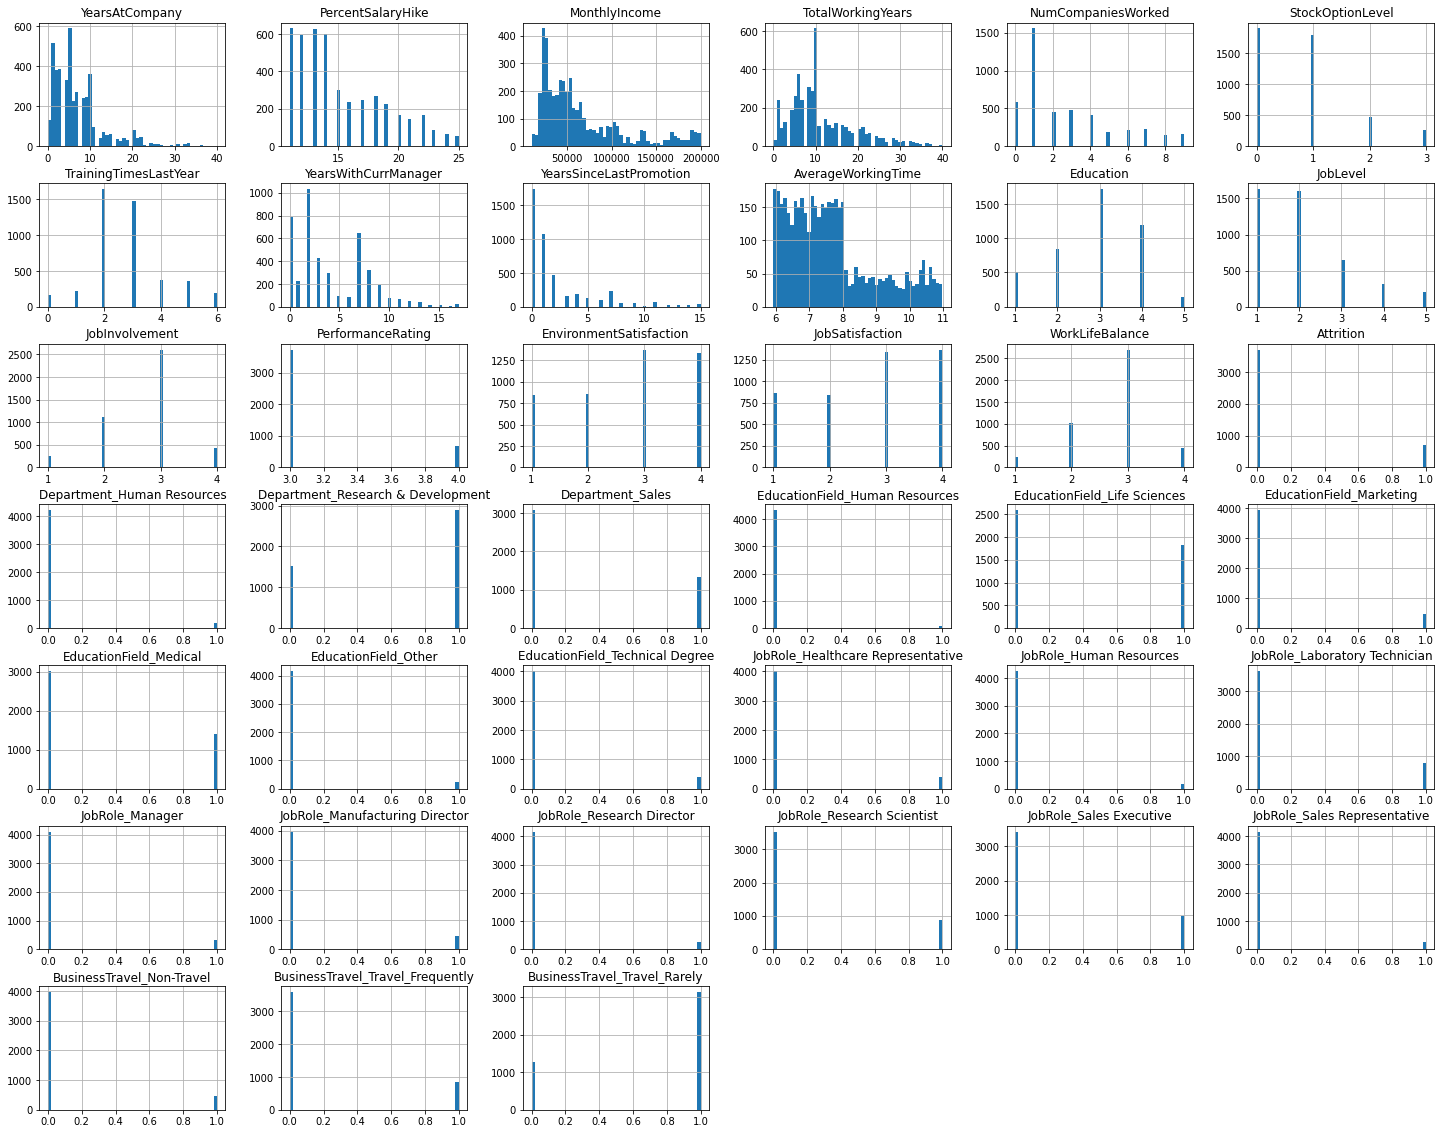

In [104]:
df_prepared.hist(bins=50, figsize=(25,20))
plt.show()

<h1 style="font-size:20px">3- Corrélation:</h1>
<p style="font-size:14px"> La corrélation est une mesure statistique qui permet de quantifier la relation entre deux variables ou plus. La corrélation peut être positive ou négative, ou nulle, selon la nature de la relation entre les variables.

La corrélation positive indique qu'il y a une relation directe entre les variables, c'est-à-dire que si une variable augmente, l'autre variable augmente également.

La corrélation négative indique qu'il y a une relation inverse entre les variables, c'est-à-dire que si une variable augmente, l'autre variable diminue.

In [105]:
data_corr = df_prepared.corr()
data_corr.style.background_gradient(cmap="Blues")

,YearsAtCompany,PercentSalaryHike,MonthlyIncome,TotalWorkingYears,NumCompaniesWorked,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,YearsSinceLastPromotion,AverageWorkingTime,Education,JobLevel,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
YearsAtCompany,1.000000,-0.029707,0.000995,0.626737,-0.117490,0.007886,-0.007894,0.769212,0.618409,-0.022555,0.006080,-0.064219,0.008314,-0.011038,0.000098,-0.002098,0.014343,-0.134392,-0.045801,0.027818,-0.008611,-0.049815,0.008361,-0.012266,-0.002817,0.001128,0.026001,-0.024588,0.029209,0.008422,0.019743,0.005147,-0.005706,-0.002056,0.012122,-0.047968,0.007623,0.012991,-0.016274
PercentSalaryHike,-0.029707,1.000000,0.004325,-0.018810,0.031062,0.012548,-0.037392,-0.040864,-0.029542,0.029168,-0.040531,0.010973,-0.004658,0.773550,0.000850,0.030626,-0.040305,0.032533,-0.025888,0.030735,-0.020403,-0.016142,0.010209,-0.027726,0.029116,0.019297,-0.042701,0.019939,-0.035124,0.039401,-0.003199,-0.017697,-0.009640,-0.009871,-0.041760,0.066547,0.037820,-0.005724,-0.020287
MonthlyIncome,0.000995,0.004325,1.000000,-0.033758,-0.020515,0.026930,0.050112,0.024304,0.065219,-0.012224,0.006410,0.047316,0.023346,0.016093,-0.005747,0.004716,0.003705,-0.031176,-0.032034,0.063023,-0.051110,-0.013301,0.005027,-0.044386,0.029833,0.003781,-0.005724,-0.026887,-0.026453,0.012624,-0.009477,0.029201,0.002262,-0.000567,0.001785,0.001776,0.060292,-0.029383,-0.014891
TotalWorkingYears,0.626737,-0.018810,-0.033758,1.000000,0.238273,0.002743,-0.040843,0.458403,0.404015,-0.012489,-0.010813,-0.036779,0.006778,-0.001458,-0.002433,-0.016703,0.001254,-0.170162,-0.032609,0.049629,-0.036996,-0.048545,0.008819,-0.014115,0.007592,-0.033075,0.037158,-0.036959,0.017803,0.036715,0.021597,-0.004856,-0.008301,-0.017981,0.016696,-0.037542,-0.029757,-0.011745,0.029959
NumCompaniesWorked,-0.117490,0.031062,-0.020515,0.238273,1.000000,0.017282,-0.032225,-0.109207,-0.036326,-0.014856,-0.016195,-0.010116,0.027994,0.018135,0.013060,-0.055585,-0.008844,0.042064,-0.055565,0.051688,-0.029013,-0.039305,0.007803,0.012588,-0.012529,-0.002453,0.013688,0.009929,0.025142,0.006789,-0.005619,0.003980,0.013212,-0.019840,-0.019397,0.013684,0.001704,-0.040441,0.033700
StockOptionLevel,0.007886,0.012548,0.026930,0.002743,0.017282,1.000000,-0.069902,0.017757,0.019063,-0.012880,0.001261,0.000993,0.010295,-0.036348,-0.004842,0.039757,-0.022701,-0.006839,0.011773,-0.021681,0.017252,0.003362,-0.042330,-0.008297,0.062962,0.006619,-0.027354,0.008415,-0.009864,-0.007577,-0.081638,0.031840,-0.029961,0.026398,0.040747,-0.030767,-0.005492,0.002238,0.001734
TrainingTimesLastYear,-0.007894,-0.037392,0.050112,-0.040843,-0.032225,-0.069902,1.000000,-0.013270,0.016121,-0.008218,0.010472,-0.032500,-0.010144,-0.022895,0.017885,-0.021522,-0.014834,-0.049431,-0.029598,0.010932,0.001726,-0.025872,0.032825,-0.001856,-0.010090,-0.031150,-0.000942,-0.023548,-0.027330,-0.019429,0.003052,-0.013987,0.030374,-0.033604,0.060250,0.017509,0.055976,-0.015402,-0.024056
YearsWithCurrManager,0.769212,-0.040864,0.024304,0.458403,-0.109207,0.017757,-0.013270,1.000000,0.510224,-0.037254,0.005358,-0.055251,-0.001372,-0.009426,-0.006054,-0.024653,0.007358,-0.156199,-0.051562,0.023920,-0.002039,-0.065796,0.012547,-0.020004,0.011435,-0.005897,0.017176,-0.014144,0.021266,0.014071,-0.042449,-0.021653,-0.025096,0.039219,0.028398,-0.042322,0.016716,0.012628,-0.022023
YearsSinceLastP

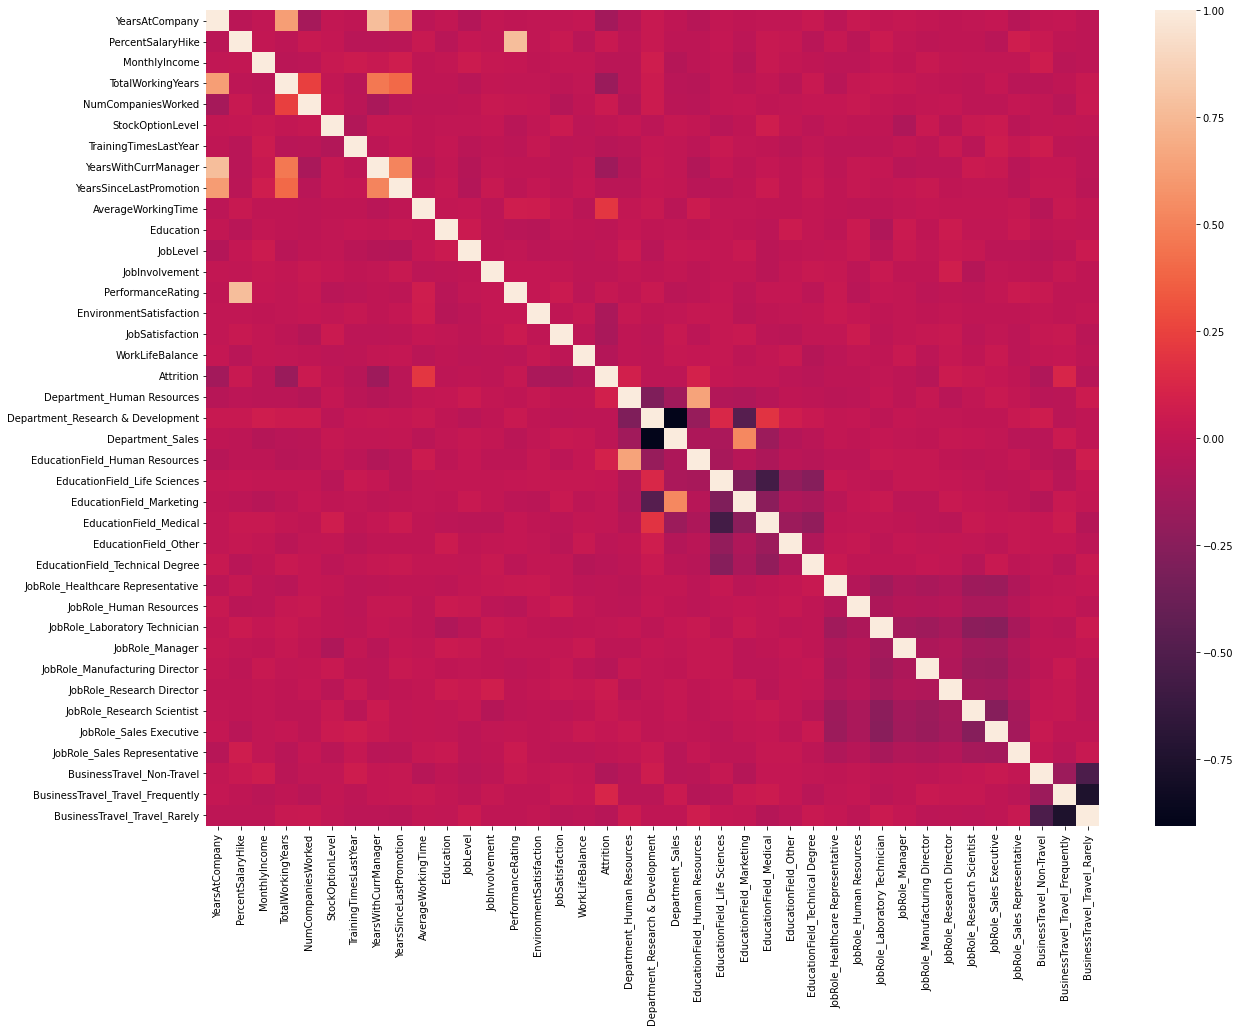

Attrition                            1.000000
AverageWorkingTime                   0.201683
BusinessTravel_Travel_Frequently     0.115143
EducationField_Human Resources       0.091573
Department_Human Resources           0.080768
JobRole_Research Director            0.049760
NumCompaniesWorked                   0.042064
PercentSalaryHike                    0.032533
JobRole_Research Scientist           0.027460
PerformanceRating                    0.023403
EducationField_Life Sciences         0.012394
JobRole_Sales Executive              0.010869
JobRole_Laboratory Technician        0.001179
EducationField_Medical               0.000764
EducationField_Marketing            -0.003780
StockOptionLevel                    -0.006839
JobLevel                            -0.010290
JobRole_Sales Representative        -0.011073
JobRole_Healthcare Representative   -0.013768
JobRole_Human Resources             -0.013857
Education                           -0.015111
Department_Research & Development 

In [106]:
import seaborn 
seaborn.heatmap(data_corr) 
plt.show()
print(data_corr["Attrition"].sort_values(ascending=False))

<p style="font-size:16px">On remarque que chaque attribut est fort corrélé avec lui même qui sont avec une couleur bleu foncé, et chaque attribut est corrélé avec d'autre attribut ont une couleur bleu un peu foncé selon le taux de la corrélation.</p>
<p style="font-size:16px">On a constaté que l'attrition a une corrélation avec  <strong>PercentSalaryHike, Years since Last Promotion, Training times last year, Job satisfaction..Etc</strong> .</p>


## III - Split de nos données:
<p style="font-size:16px">Nous allons diviser nos données en 2 ensemble de données. Un ensemble d'entrainement (train=80%) et un ensemble de test (20%).</p>

In [107]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

x = df_prepared.drop(["Attrition"], axis=1).values #supprimer Attrition comme c'est la variable cible
y = df_prepared["Attrition"].values 

train_index, test_index = list(split.split(x, y))[0]
x_train, y_train = x[train_index], y[train_index]
x_test, y_test = x[test_index], y[test_index]

## IV - Entrainement de plusieurs models:
<p style="font-size:14px">Comme précisé auparavant, l'object de notre étude est de prédire si un employé est susceptible de quitter l'entreprise ou non via un <strong>apprentissage supervisé</strong>. Il s'agit alors d'une <strong>classification binaire</strong>.</p>

<p style="font-size:14px">Voici les modèles de classification binaire traitée:</p> 
<p style="font-size:14px">-SGD </p> L'algorithme SGD est un algorithme d'optimisation itératif utilisé pour entraîner des modèles de classification binaire, tels que les SVM et les réseaux de neurones. Il s'appelle "stochastique" car il utilise des mini-batchs d'exemples d'entraînement pour calculer les gradients de la fonction de perte et mettre à jour les poids du modèle de manière itérative.
<p style="font-size:14px">- Logistic Régression</p>  Il s'agit d'un modèle de régression linéaire qui est utilisé pour prédire la probabilité d'appartenance à une classe donnée. En utilisant une fonction de transformation logistique pour restreindre les prédictions à une plage entre 0 et 1, la régression logistique peut être utilisée pour la classification binaire.
<p style="font-size:14px">- Random Forest (RandomForestClassifier)</p>   Il s'agit d'un algorithme d'apprentissage supervisé basé sur l'agrégation de multiples arbres de décision. En combinant les prédictions de plusieurs arbres entraînés sur des sous-ensembles aléatoires de données, le modèle peut atteindre une grande précision dans la classification binaire.
<p style="font-size:14px">Et nous allons calculer ces métriques la pour pouvoir choisir le modèle le plus adapté qui sont:</p>
<p style="font-size:14px">- <strong>Matrice de confusion :</strong> Une matrice de confusion est un tableau souvent utilisé pour décrire les performances d'un modèle de classification (ou "classificateur") sur un ensemble de données de test dont les vraies valeurs sont connues. La matrice de confusion elle-même est relativement simple à comprendre</p>
<p style="font-size:14px">- <strong>Accuracy :</strong> est le nombre total d'enregistrements dans les données de test, combien en avez-vous correctement classé ?</p>
<p style="font-size:14px">- <strong>Précision :</strong> A chaque fois que vous classez un enregistrement comme positif, quel est le % de chance que vous ayez raison ?</p>
<p style="font-size:14px">- <strong>Rappel :</strong> Parmi tous les enregistrements d'une classe particulière, combien en avez-vous correctement classés ?</p>
<p style="font-size:14px">- <strong>F1-score :</strong> Moyenne harmonique de Précision et Rappel.</p>
F1 Score : Le score F1 est une mesure de l'exactitude d'un modèle qui équilibre à la fois la précision et le rappel. C'est la moyenne harmonique de la précision et du rappel et est calculé comme suit :

Score F1 = 2 * (précision * rappel) / (précision + rappel)

Le score F1 varie de 0 à 1, 1 étant le meilleur score possible. Il est couramment utilisé dans les problèmes de classification binaire lorsque les classes sont déséquilibrées.

Matrice de confusion : Une matrice de confusion est une table qui résume la performance d'un modèle de classification en comparant ses prédictions aux valeurs réelles. Elle montre le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs.

Vrai positif (VP) : Le modèle a correctement prédit la classe positive.

Vrai négatif (VN) : Le modèle a correctement prédit la classe négative.

Faux positif (FP) : Le modèle a prédit la classe positive, mais la classe réelle était négative.

Faux négatif (FN) : Le modèle a prédit la classe négative, mais la classe réelle était positive.

Score de précision : La précision est la fraction de vrais positifs parmi le nombre total de prédictions positives effectuées par le modèle. Elle est calculée comme suit :

Précision = VP / (VP + FP)

Une précision élevée indique que le modèle fait peu de fausses prédictions positives.

Score de rappel : Le rappel est la fraction de vrais positifs parmi le nombre total de cas positifs réels. Il est calculé comme suit :

Rappel = VP / (VP + FN)

Un rappel élevé indique que le modèle identifie correctement la plupart des cas positifs.

Courbe précision-rappel : La courbe précision-rappel est une représentation graphique de la balance entre la précision et le rappel pour différents seuils de classification. Elle trace la précision sur l'axe des y et le rappel sur l'axe des x pour différents seuils. L'aire sous la courbe (AUC) peut être utilisée pour comparer différents modèles.

Courbe ROC : La courbe caractéristique de fonctionnement du récepteur (ROC) est une représentation graphique de la balance entre le taux de vrais positifs (TVP) et le taux de faux positifs (TFP) pour différents seuils de classification. Elle trace TVP sur l'axe des y et TFP sur l'axe des x pour différents seuils. L'AUC peut être utilisée pour comparer différents modèles.

Score ROC AUC : Le score ROC AUC est l'aire sous la courbe ROC. Il varie de 0 à 1, 1 indiquant un classificateur parfait et 0,5 indiquant un classificateur aléatoire. Le score ROC AUC est utilisé pour comparer les performances de différents modèles.
Models_result : un dictionnaire Python appelé models_result qui peut être utilisé pour stocker les résultats d'évaluation de différents modèles de classification binaire.



In [108]:
models_result = {'Model': [], 'Cross-Validation-Score': [], 'Precision-score': [], 'Recall-score': [], 'F1-score': []}

In [109]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score

#Function to draw precision / recall vs threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

Après avoir choisi les modèles de classification, nous allons commencer à entrainer les données:

SGDClassifier:


In [110]:
#calcule la précision, le rappel et le score F1 pour le modèle en utilisant les données de test, 
#et stocke ces résultats ainsi que le score de validation croisée moyenne pour le modèle dans un dictionnaire models_result.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=50)
sgd_clf.fit(x_train, y_train)

sgd_pred = sgd_clf.predict(x_test)

models_result["Model"].append("SGDClassifier")
models_result["Cross-Validation-Score"].append(cross_val_score(sgd_clf, x_test, y_test, cv=5, scoring="accuracy").mean())
models_result["Precision-score"].append(precision_score(y_test, sgd_pred))
models_result["Recall-score"].append(recall_score(y_test, sgd_pred))
models_result["F1-score"].append(f1_score(y_test, sgd_pred, average='macro'))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:13

La validation croisée est une méthode d'évaluation des performances d'un modèle d'apprentissage automatique qui consiste à diviser les données en plusieurs sous-ensembles, ou "folds", puis à entraîner le modèle sur une partie des données et à le tester sur une autre partie. Cette procédure est répétée plusieurs fois, en utilisant différents sous-ensembles pour l'entraînement et le test, et les performances du modèle sont ensuite évaluées en moyenne sur toutes les itérations.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


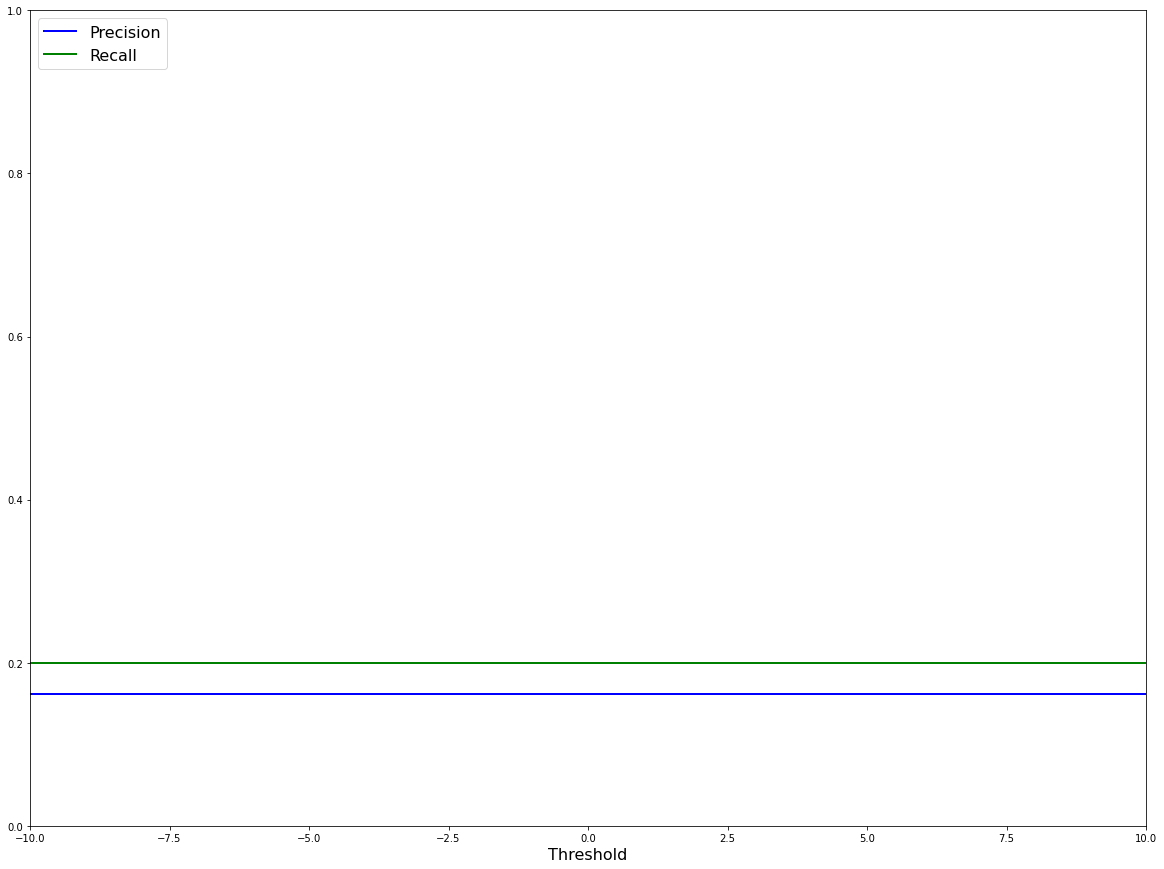

In [111]:
#visualiser la relation entre la précision et le rappel pour un modèle de classification binaire.
# Il utilise les scores de décision pour calculer les précisions, rappels et seuils de décision,
 # qui sont ensuite tracés sur un graphique précision-rappel en fonction des seuils.
y_scores_sgd = cross_val_predict(sgd_clf, x_test, y_test, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_sgd)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
plt.show()

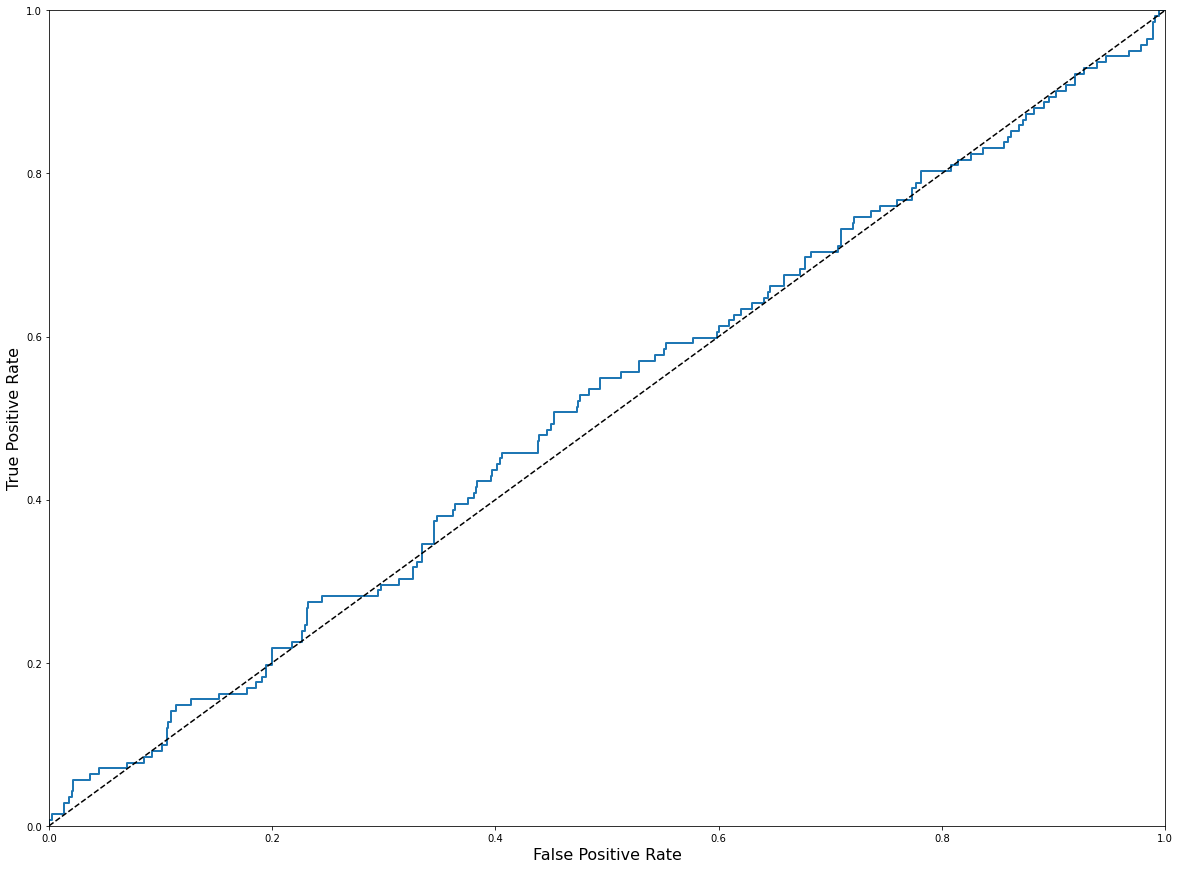

In [112]:

#Courbe ROC
fpr_sgd, tpr_sgd, thresholds = roc_curve(y_test, y_scores_sgd)

plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

In [113]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, sgd_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

Accuracy: 83.90%

COnfusion Matrix:
 [[740   0]
 [142   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       740
         1.0       0.00      0.00      0.00       142

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.77       882



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On constate que l'accuracy est 83,90% ou on a créé une matrice de confusion afin de décrire les performances complète du modèle utilisé.


<p style="font-size:20px;font-weight:bold">LogisticRegression:</p>

In [114]:
from sklearn.linear_model import LogisticRegression

logi_clf = LogisticRegression()
logi_clf.fit(x_train, y_train)

logi_pred = logi_clf.predict(x_test)

models_result["Model"].append("LogisticRegression")
models_result["Cross-Validation-Score"].append(cross_val_score(logi_clf, x_test, y_test, cv=3, scoring="accuracy").mean())
models_result["Precision-score"].append(precision_score(y_test, logi_pred))
models_result["Recall-score"].append(recall_score(y_test, logi_pred))
models_result["F1-score"].append(f1_score(y_test, logi_pred, average='macro'))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


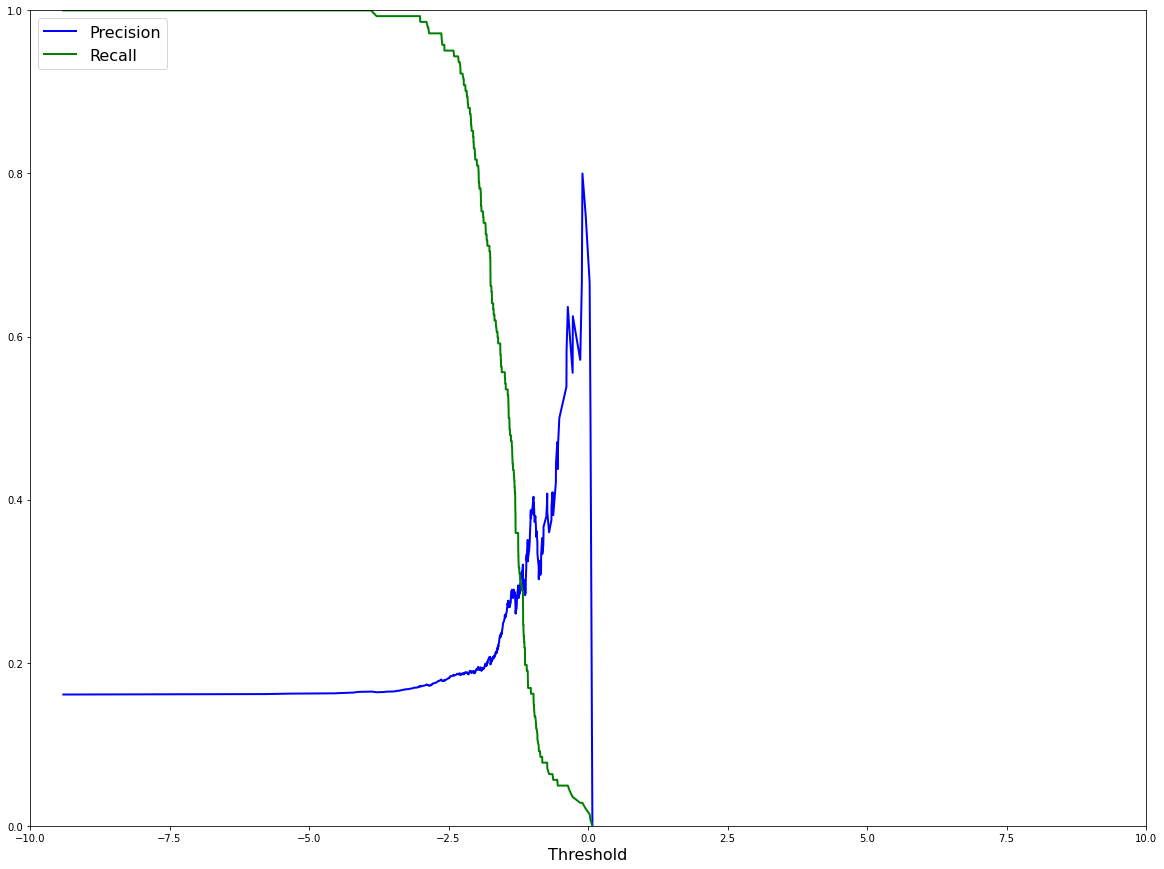

In [115]:
y_scores_logi = cross_val_predict(logi_clf, x_test, y_test, cv=5, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_logi)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
plt.show()

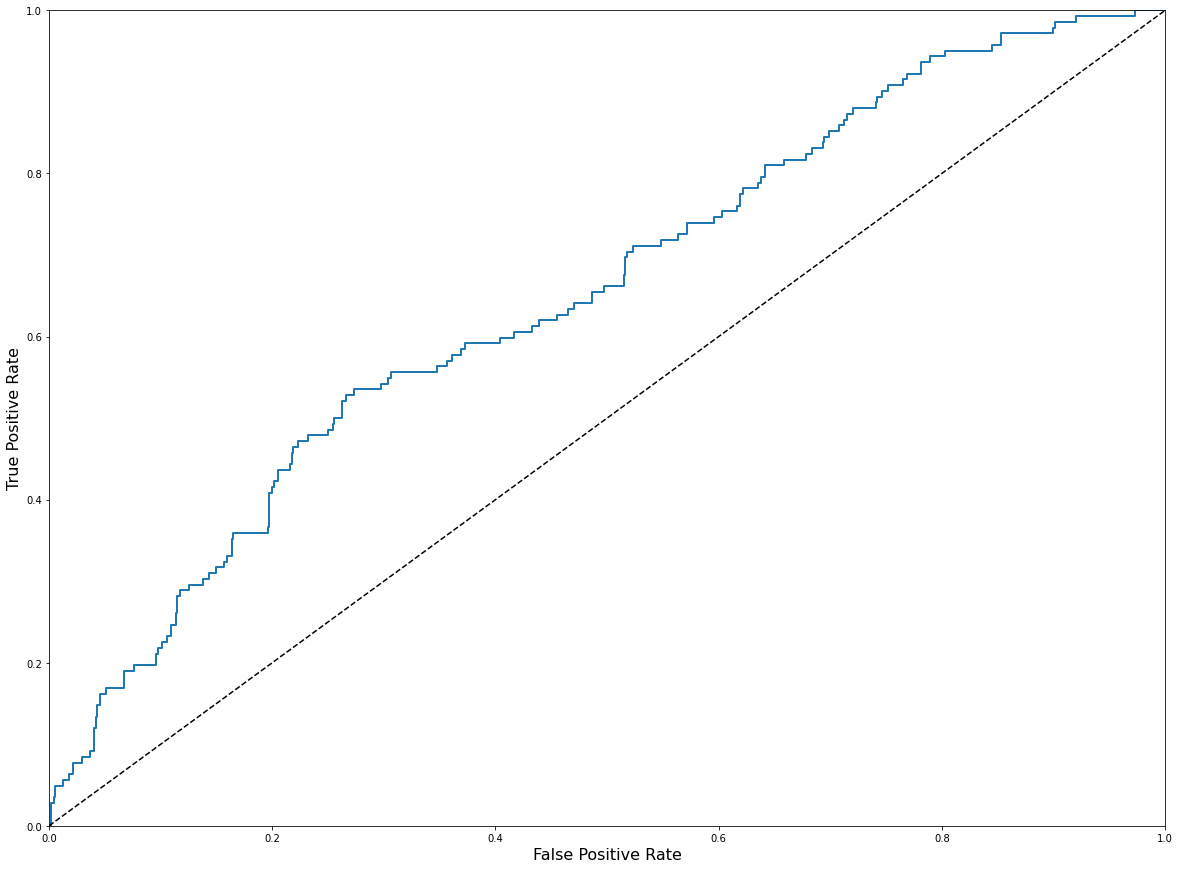

In [116]:
fpr_logi, tpr_logi, thresholds = roc_curve(y_test, y_scores_logi)

plot_roc_curve(fpr_logi, tpr_logi)
plt.show()

In [117]:

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, logi_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, logi_pred))
print(classification_report(y_test, logi_pred))


Accuracy: 83.90%

COnfusion Matrix:
 [[740   0]
 [142   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       740
         1.0       0.00      0.00      0.00       142

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.77       882



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p style="font-size:16px">On constate que l'accuracy est a 83.90% ou on a crée une matrice de confusion afin de décrire les performances complète du modèle utilisé et en calculant la precision, recall,...</p>

<p style="font-size:16px;font-weight:bold">RandomForestClassifier:</p>

In [118]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10)
forest_clf.fit(x_train, y_train) #fit ser à entrainer le modèle sur les données

forest_pred = forest_clf.predict(x_test)

models_result["Model"].append("RandomForestClassifier")
models_result["Cross-Validation-Score"].append(cross_val_score(forest_clf, x_test, y_test, cv=3, scoring="accuracy").mean())
models_result["Precision-score"].append(precision_score(y_test, forest_pred))
models_result["Recall-score"].append(recall_score(y_test, forest_pred))
models_result["F1-score"].append(f1_score(y_test, forest_pred, average='macro'))

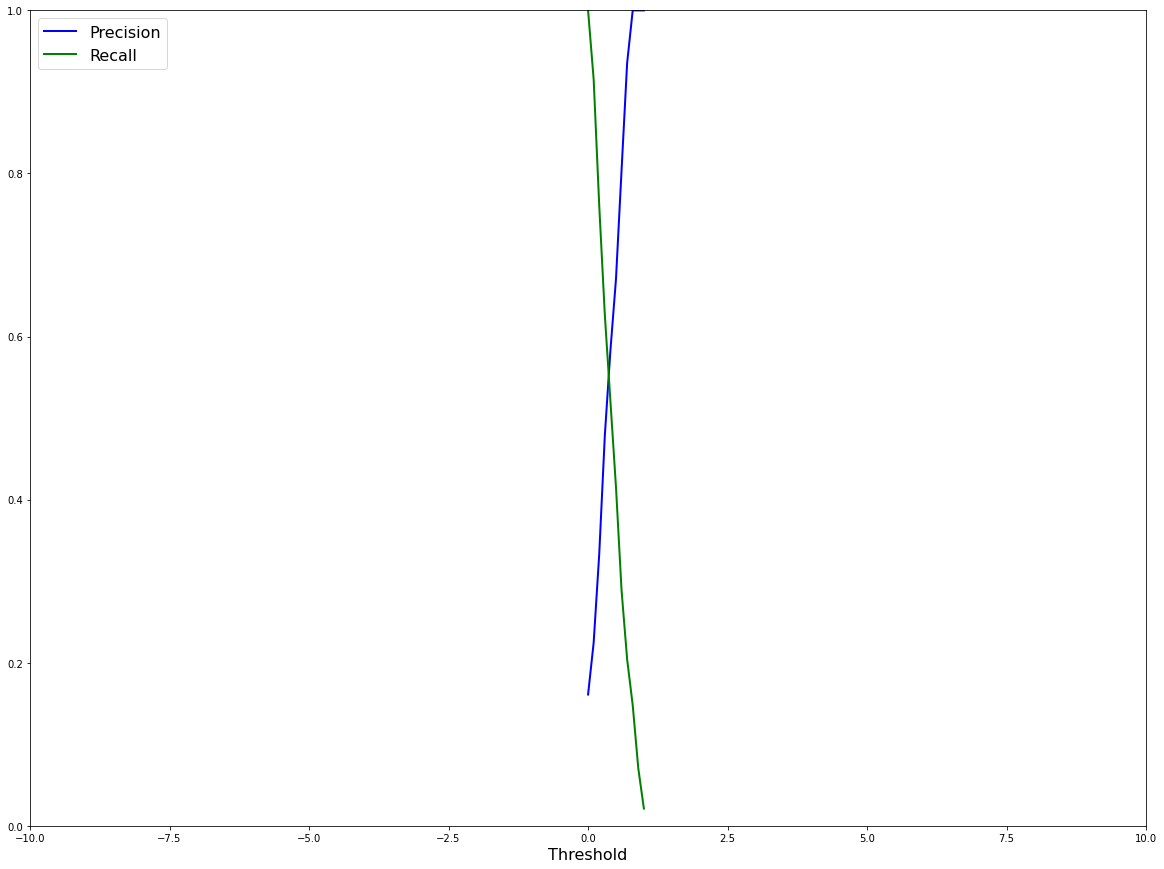

In [119]:
y_scores_forest = cross_val_predict(forest_clf, x_test, y_test, cv=5, method="predict_proba")[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_forest)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
plt.show()

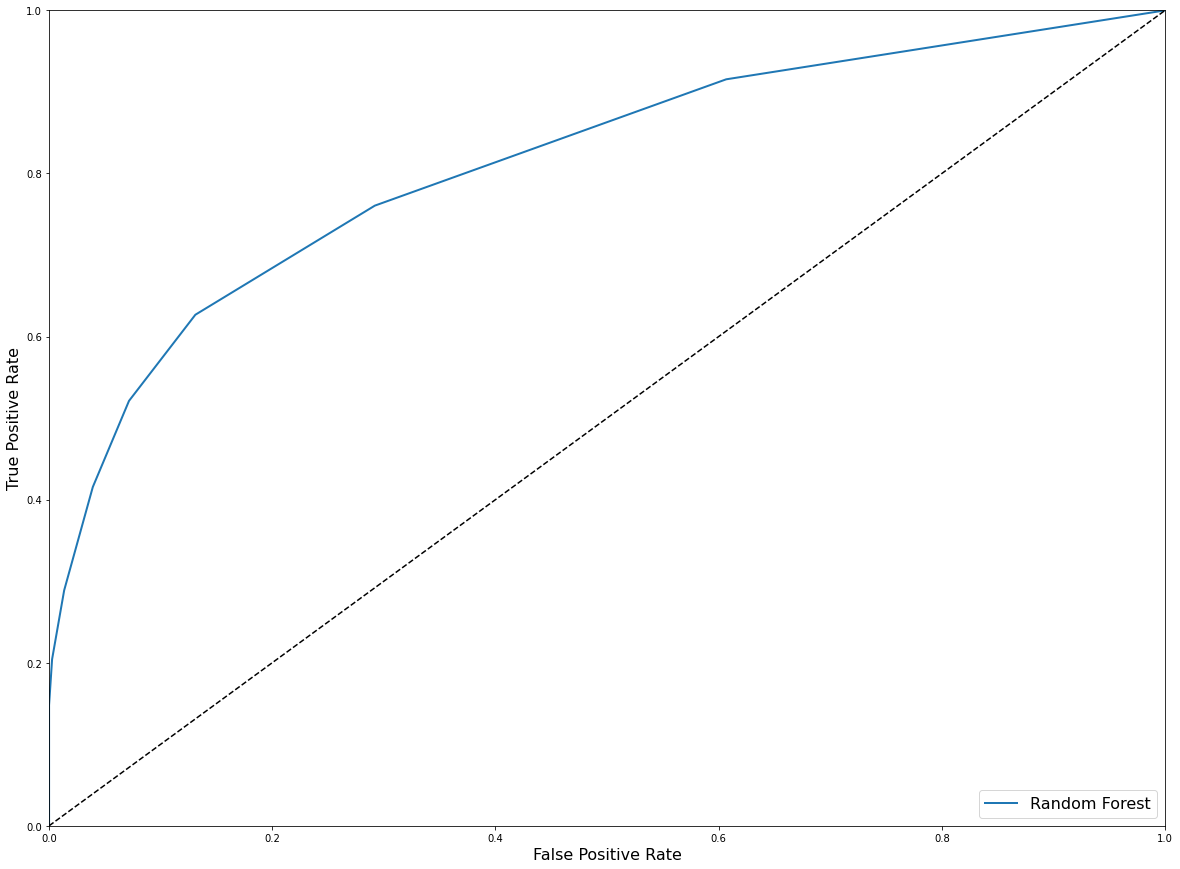

In [120]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_scores_forest)

roc_auc_score(y_test, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [121]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, forest_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

Accuracy: 98.87%

COnfusion Matrix:
 [[740   0]
 [ 10 132]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       740
         1.0       1.00      0.93      0.96       142

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882



<p style="font-size:16px">On constate que l'accuracy est a 98.87% ou on a crée une matrice de confusion afin de décrire les performances complète du modèle utilisé.</p>


Cette matrice indique que le modèle a réussi à prédire correctement la classe positive pour 132 des observations de test, mais a également prédit à tort que 10 des observations négatives appartenaient à la classe positive. Cependant, le modèle a correctement identifié toutes les observations négatives dans l'ensemble de données de test.

## V - Comparaison des résultats:

In [122]:
pd.DataFrame(models_result)

,Model,Cross-Validation-Score,Precision-score,Recall-score,F1-score
0,SGDClassifier,0.702645,0.0,0.000000,0.456227
1,LogisticRegression,0.841270,0.0,0.000000,0.456227
2,RandomForestClassifier,0.873016,1.0,0.929577,0.978396


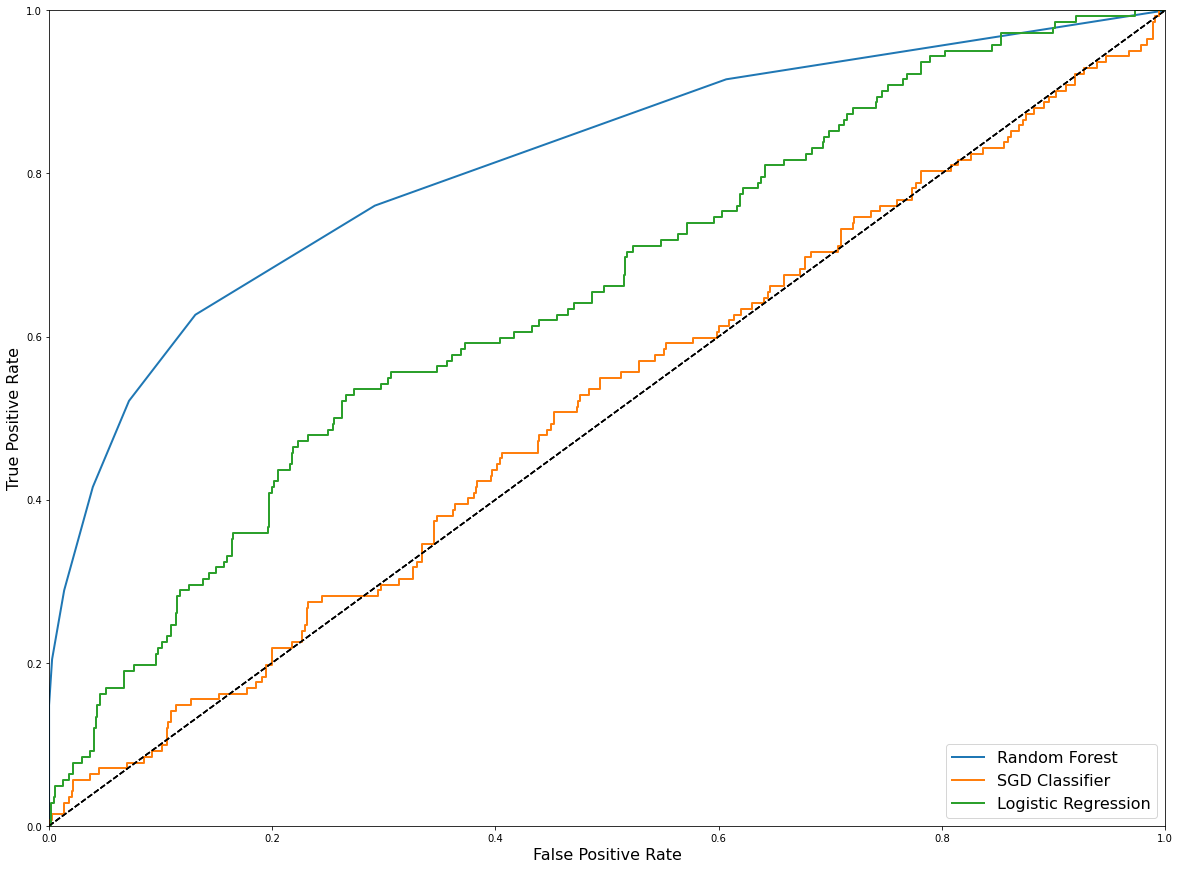

In [123]:
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD Classifier")
plot_roc_curve(fpr_logi, tpr_logi, "Logistic Regression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

<p style="font-size:16px">Comme nous pouvons le constater en comparant les résultats obtenus, notre choix c'est porter sur le modele de Random Forest (`RandomForestClassifier`)</p>

## VI - Optimisation du modéle:

Les hyperparamètres correspondent aux paramètres d’ajustement des algorithmes d’apprentissage automatisé ou de machine learning. Leur réglage (tuning) permets d'améliorer les performanes d'un modele.

In [124]:
#trouver les paramètres qui maximisent les performances du modèle
#Ce code permet de trouver les valeurs des paramètres qui maximisent les performances du modèle s'appliquant sur nos données en utilisant GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [False], 'n_estimators': [20, 30], 'max_features': [2, 3, 4]},
  ]

final_clf = RandomForestClassifier() 

grid_search = GridSearchCV(final_clf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

#Le meilleur tuning est
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=2, n_estimators=30)

In [125]:

forest_clf = RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=30)
forest_clf.fit(x_train, y_train)

forest_pred = forest_clf.predict(x_test)

models_result = {'Model': [], 'Cross-Validation-Score': [], 'Precision-score': [], 'Recall-score': [], 'F1-score': []}

#Calcule du score après GridSearchCV
models_result["Model"].append("RandomForestClassifier")
models_result["Cross-Validation-Score"].append(cross_val_score(forest_clf, x_test, y_test, cv=3, scoring="accuracy").mean())
models_result["Precision-score"].append(precision_score(y_test, forest_pred))
models_result["Recall-score"].append(recall_score(y_test, forest_pred))
models_result["F1-score"].append(f1_score(y_test, forest_pred, average='macro'))

print("RandomForestClassifier Après optimisation")
pd.DataFrame(models_result)

RandomForestClassifier Après optimisation


,Model,Cross-Validation-Score,Precision-score,Recall-score,F1-score
0,RandomForestClassifier,0.879819,0.97931,1.0,0.993758


Pour l’apprentissage de nos modèles, le dataset est divisé en deux parties : Train (80 % du dataset) et Test : (20 % du dataset). Nous constatons que les résultats des modèles sont très proches dans l'ensemble de données .Nous remarquons que le modèle random forest. a pu surpasser les résultats obtenus par les modèles devlopé avec un score 98.19% (accuracy qu'on a calculé avant)

Et ça pour toutes les métrique,s en comparant avec les métrique des autres modèles on coclut que le random forest est le plus adapté pour notre problème de classification.

In [126]:
df_features_importance = pd.DataFrame({'Attributs': list(set(columns) - set(["Attrition"])), 'Importance': forest_clf.feature_importances_})
df_features_importance.sort_values(by="Importance", ascending=False)

,Attributs,Importance
9,PerformanceRating,0.110102
3,PercentSalaryHike,0.085922
2,JobRole_Laboratory Technician,0.072755
0,EducationField_Human Resources,0.062517
1,YearsAtCompany,0.053016
7,JobRole_Human Resources,0.052079
4,AverageWorkingTime,0.049518
14,JobSatisfaction,0.041162
8,Education,0.038674
15,JobRole_Research Scientist,0.037979


Les solution face au principaux facteur de départ <br>
Rappel des facteur : <br>
à la suite des analyses précédentes on a pu constater que le principal problème à l'origine du turnover dans l'entreprise était le manque de reconnaissance des employés. Les employés ne se sentent pas assez impliqués dans leur travail et ils estiment que leurs augmentations de salaire sont insuffisantes. En particulier, les techniciens ne se sentent pas assez reconnus sur leur lieu de travail.<br>
Solution :<br>
Pour remédier à cette situation, il est important de prendre des mesures pour encourager l'implication des employés, tels que la création d'un programme de reconnaissance des employés, l'organisation d'événements pour renforcer le sentiment d'appartenance à l'entreprise et la mise en place de groupes de travail pour les employés.<br>
Il est également essentiel de revoir la politique de rémunération de l'entreprise afin de garantir que les salaires soient justes et en adéquation avec les compétences et les responsabilités des employés. Il est important de communiquer de manière claire et transparente sur les politiques salariales de l'entreprise afin de garantir une plus grande équité.<br>
Enfin, pour remédier au manque de reconnaissance des techniciens, il est recommandé de mettre en place des programmes de formation et de développement professionnel pour leur permettre de progresser dans leur carrière. Il est également important de mettre en place un système de reconnaissance et de récompenses pour les techniciens qui font preuve d'excellence dans leur travail.
<br>
En conclusion :<br>
En conclusion, pour améliorer la situation de turnover dans l'entreprise, il est essentiel de prendre en compte les préoccupations des employés concernant le manque de reconnaissance et de proposer des solutions concrètes pour encourager leur implication. Cela passe notamment par la mise en place de programmes de reconnaissance et de récompenses, la révision de la politique de rémunération de l'entreprise et l'offre de programmes de formation et de développement professionnel pour les employés. Ces actions contribueront à créer un environnement de travail plus épanouissant pour les employés et à réduire le taux de turnover dans l'entreprise.
